# Quantitative Biology and Biophysics (AS.020.674/618)	Spring 2024
## Lab 6: Hilser 
## April 05, 2024

#  1. Thermodynamics: 2-State Transitions

Today we’re going to explore the thermodynamic properties of a two-state equilibrium between folding states **F** and **U**.

## Libraries you will need

In [52]:
import numpy as np
import matplotlib.pyplot as plt

## A. Define Constants

For a two-state equilibrium between folding states **F** and **U**, we will need to define; 

$\Delta$H(Tm) -  the enthalpy difference between **U** and **F** at the transition temperature. <br>
Tm -  the transition temperature.<br>
$\Delta$Cp -  the heat capacity difference between **U** and **F**.

Experimentally, $\Delta$H can be measured through calorimetry, which enables us to calculate $\Delta$G and $\Delta$S.

We know that $\Delta$G(T) = $\Delta$H(T) - T*$\Delta$S(T)  
Because @ Tm the $\Delta$G(Tm) = 0  we can write the expression:

$\Delta$G(Tm) = 0 = $\Delta$H(Tm) - Tm*$\Delta$S(Tm) 

which lets us calculate the entropy difference as;

$\Delta$S(Tm) = $\Delta$H(Tm)/Tm.

I will provide you with the following:

R = 1.987 <br>
Tm = 323.15 <br>
$\Delta$H(Tm) = 100000 <br>
$\Delta$Cp = 0 <br>

**Do the following:**

Calculate $\Delta$S(Tm).

# <font color='red'>Student Input Cell: 2 points</font>   

In [84]:
R = 1.987
Tm = 323.15
delta_Htm = 10000
delta_cp = 0

delta_Stm = delta_Htm / Tm
print(delta_Stm)

30.94538140182578


## B. Define Thermodynamic Functions

From the $\Delta$H(Tm), $\Delta$S(Tm) and $\Delta$Cp, we can calcualte the enthalpy, entropy, and free energy differences at any temperature:

1. $\Delta$H(T) = $\Delta$H(Tm) + $\Delta$Cp(T - Tm)
2. $\Delta$S(T) = $\Delta$S(Tm) + $\Delta$Cp*ln(T / Tm)
3. $\Delta$G(T) = $\Delta$H(T) - T*$\Delta$S(T)

**Do the following:**

1. Plot $\Delta$H(T) and T*$\Delta$S(T) in the same plot for the temperature range: (273, 373).
2. Plot $\Delta$G(T) in a separate plot for the same temperature range.

# <font color='red'>Student Input Cell: 10 points</font>   

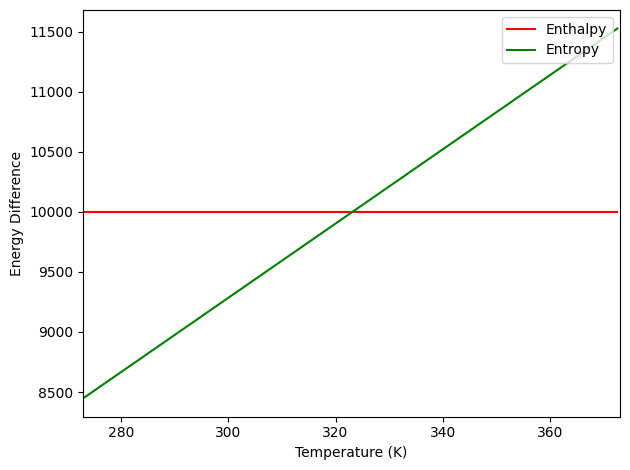

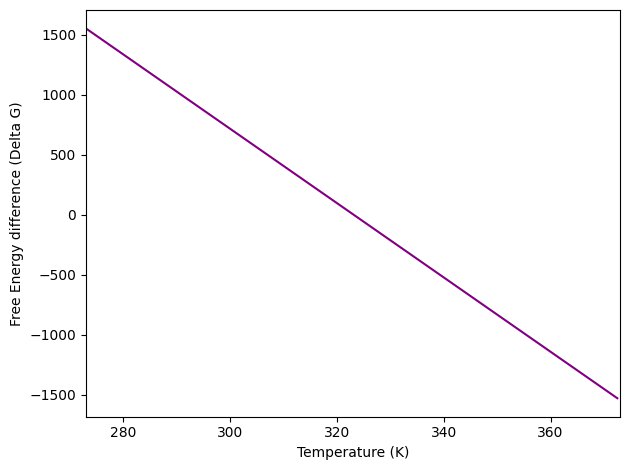

In [78]:
T = np.arange(273, 373, 0.5)

Enthalpy = delta_Htm + delta_cp*(T-Tm)
Entropy = T * (delta_Stm + delta_cp*np.log(T/Tm))
delta_G_T = Enthalpy - Entropy



plt.plot(T, Enthalpy, label = "Enthalpy", color = 'red')
plt.plot(T, Entropy, label = "Entropy", color = 'green')

plt.ylabel("Energy Difference")
plt.xlabel("Temperature (K)")
plt.xlim(273,373)
plt.legend(loc = "upper right")

plt.tight_layout()
plt.show()


plt.plot(T, delta_G_T, color = 'purple')
plt.xlabel("Temperature (K)")
plt.ylabel("Free Energy difference (Delta G)")
plt.xlim(273,373)

plt.tight_layout()
plt.show()

## C. Develop Expressions for the Statistical Weights and Probabilities

The statistical weight (which is essentially an equilibrium constant) can be determined at any temperature by the expression:

4. K = exp[-$\Delta$G / RT]

The partition function is just the sum of all the statistical weights at any temperature:

5. Q = $\Sigma$K

and the probability of any state is:

6. P = K / Q

This is shown in the table below. The free energy difference, $\Delta$Gu (Gu - Gf), allows us to determine all the expressions you require to calculate the probabilities.

<img src="http://www.gordus.org/public_images/Hilser.png" style="width: 800px;"/>

**Do the following:**

1. Define the statistical weight for both **F** and **U** states.
2. Calculate the partition function as a function of these weights.
3. Calculate the probability of being in state **F**.
4. Calculate the probability of being in state **U**.
5. Plot the **F** and **U** probabilities in the same plot for the temperature range: (273, 373).
4. Plot $\Delta$G(T) in a separate plot for the same temperature range.

# <font color='red'>Student Input Cell: 12 points</font>   

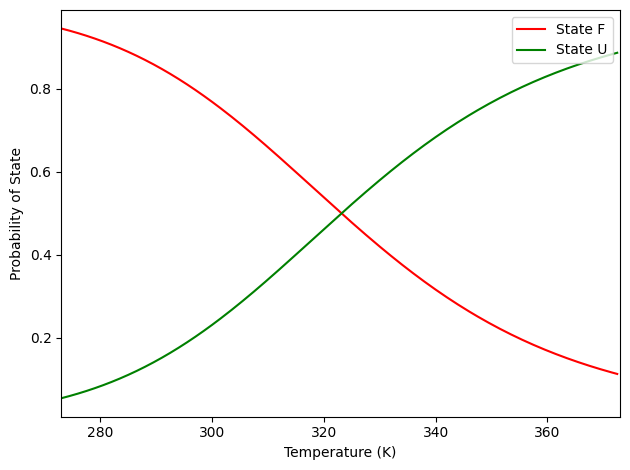

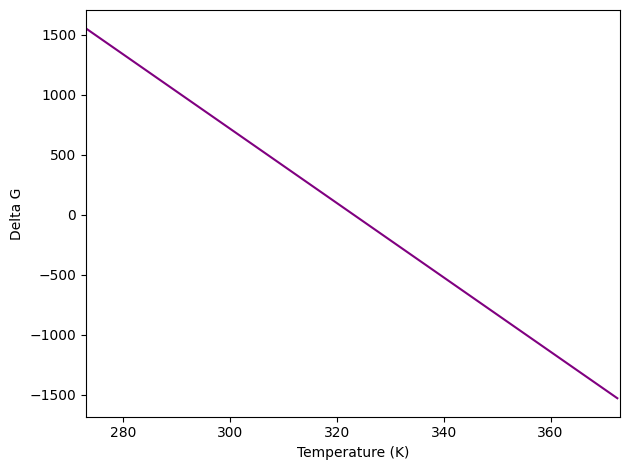

In [79]:
statWtF = 1
statWtU = np.exp((delta_G_T*-1) / (R*T))

partFxn = 1 + np.exp((delta_G_T*-1) / (R*T))

prob_F_state = statWtF / partFxn
prob_U_state = statWtU / partFxn



plt.plot(T, prob_F_state, label = "State F", color = 'red')
plt.plot(T, prob_U_state, label = "State U", color = 'green')

plt.ylabel("Probability of State")
plt.xlabel("Temperature (K)")
plt.xlim(273,373)
plt.legend(loc = "upper right")

plt.tight_layout()
plt.show()


plt.plot(T, delta_G_T, color = 'purple')
plt.xlabel("Temperature (K)")
plt.ylabel("Delta G")
plt.xlim(273,373)

plt.tight_layout()
plt.show()

# 2. Conformational Equilibrium (2 - State)

The goal of this section is to gain a knowledge of, and the ability to use, simulation as a tool to understand biological systems. This exercise introduces you to simulation, asking you to simulate the Gibbs energy and probabilities for a two-state transition with different parameters.

Here are some additional notes and helpful clues to moving forward. I told you in class that in order to simulate a two-state transition, you need two parameters ($\Delta$H and $\Delta$S), which are constant and therefore are the same at every temperature. **This is technically not true in most cases.** Both entropy and enthalpy are often temperature dependent, which is determined by the heat capacity difference ($\Delta$Cp), obeying the following relationships:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_1.png" />

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_2.png"/>

This just means that instead of writing the Gibbs energy at any temperature (i.e., $\Delta$G(T)) in terms of two constant parameters (yellow), as we did in class and as reproduced here:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_3a.png"/>

Equation 3a becomes

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_3b.png"/>

where the $\Delta$H(T) and $\Delta$S(T) vary with temperature according to eqs. 1 and 2. This means that to get an expression for the Gibbs energy at any temperature (i.e. $\Delta$G(T)) expressed in terms of constants, you just need to substitute eqs. 1 & 2 into eq. 3b and you get:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_3c.png"/>

which has four constants(yellow), the enthalpy and entropy at some reference temperature, T<sub>ref</sub> (i.e., $\Delta$H(T<sub>ref</sub>), $\Delta$S(T<sub>ref</sub>)), and $\Delta$Cp.

The next important issue regards rewriting equation 3a in terms of the transition temperature (Tm) and the enthalpy at the Tm (i.e., $\Delta$H(Tm)) instead of in terms of $\Delta$H and $\Delta$S. The reason is entirely parctical; it allows you to specify which temperature is the midpoint of the trasnistion between the two states (i.e., where $\Delta$G = 0). We can get this by noting that at the transition temperature (i.e., T = Tm), equation 3a gives:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6.png"/>

which, when rearranged, yields:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_3d.png"/>

That allows us to rewrite equation 3a as:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_3e.png" />

Note, this is exactly equivalent to eq. 3a. Thus, to simulate a two-transition when $\Delta$Cp = 0, you still need just two parameters, the enthalpy difference at Tm (i.e., $\Delta$H(Tm)) and the transition temperature (Tm), both of which are constant (yellow).

In the case when $\Delta$Cp $\neq$ 0, you need to start with eq. 3c, which after subsituting eq. 3d in place of $\Delta$S(T<sub>ref</sub>) becomes:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_4a.png" />

And upon rearranging gives:

<img src="http://www.gordus.org/public_images/Hilser_Lab_6_4b.png" />

where you can see that there are just 3 constants (yellow), and that when there is no heat capacity difference (i.e., $\Delta$Cp = 0), the second part of the equation (i.e. after the '+' sign) goes to 0, and equation 4b reduces to eq. 3e. Thus, eq. 4b is the general expression for the energy difference between two states in a two-state transition. It is the expression you will use in every simulation where the temperature dependence of a conformational transition is modeled.

## Do the following:

**1. Free Energy Simulations I (Exploring Enthalpy)**: On one graph, plot $\Delta$G vs. T (273 -> 373 K) for the following three cases:

a. Case 1: $\Delta$H = 50 kcal/mol, Tm = 50C, $\Delta$Cp = 0. <br>
b. Case 2: $\Delta$H = 100 kcal/mol, Tm = 50C, $\Delta$Cp = 0. <br>
c. Case 3: $\Delta$H = 150 kcal/mol, Tm = 50C, $\Delta$Cp = 0.

**NOTE: Tm is in Celsius, but the calculations should be in Kelvin!**

**NOTE: It may help to write a function for $\Delta$G, first.**

By inspecting the graph, what's the difference between these cases?

# <font color='red'>Student Input Cell: 6 points</font>   

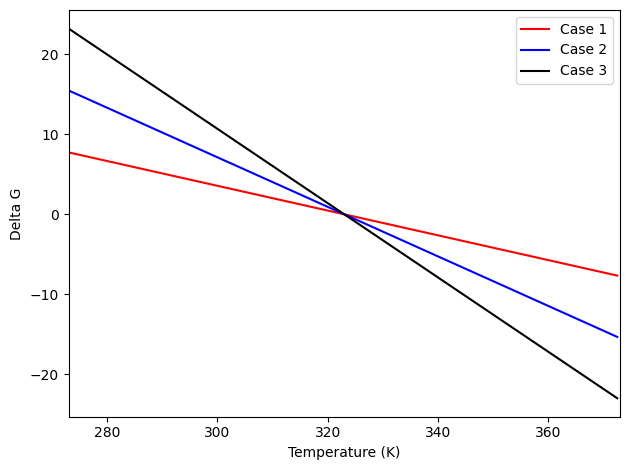

In [80]:
# Write a function for deltaG
T = np.arange(273, 373, 0.5)

def DELTA_G(deltaH, T, Tm):
    Tm = Tm + 273
    return (deltaH * (1 - (T/Tm)))
      
Case1 = DELTA_G(50, T, 50)
Case2 = DELTA_G(100, T, 50)
Case3 = DELTA_G(150, T, 50)

                   
plt.plot(T, Case1, label = "Case 1", color = 'red')
plt.plot(T, Case2, label = "Case 2", color = 'blue')
plt.plot(T, Case3, label = "Case 3", color = 'black')


plt.ylabel("Delta G")
plt.xlabel("Temperature (K)")
plt.xlim(273,373)
plt.legend(loc = "upper right")

plt.tight_layout()
plt.show()

##--------------------------------------- ##
## Answer the question below as a comment ##
##--------------------------------------- ##

# Case 1 is least sensitive to temperature, where Case 3 is most sensitive to temperature. Meaning, that small changes in temperature affect the Delta G more (Case 3), or less (Case 1)
# Which makes sense, as Case 3 has the largest change in enthalpy



**2. Population Simulations I:**
For a 2-state transition, write the expression for the statistical weights and the partition function.

a. For each case from Question 1, make a plot of the probability of the folded and unfolded states vs. T(273 -> 373 K). <br>
b. On one graph, plot the folded probability vs. T for each case. What do you observe?

# <font color='red'>Student Input Cell: 8 points</font>   

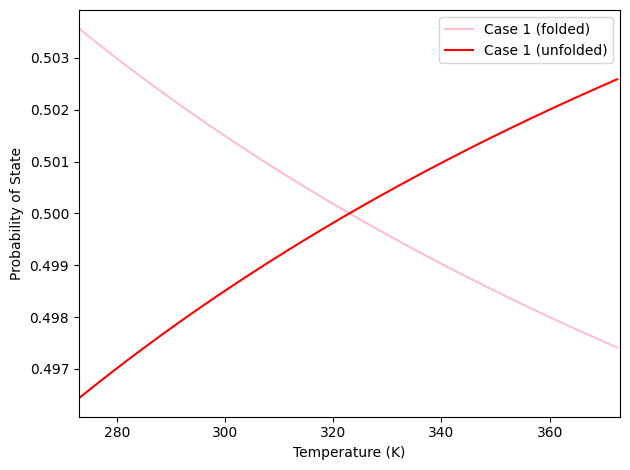

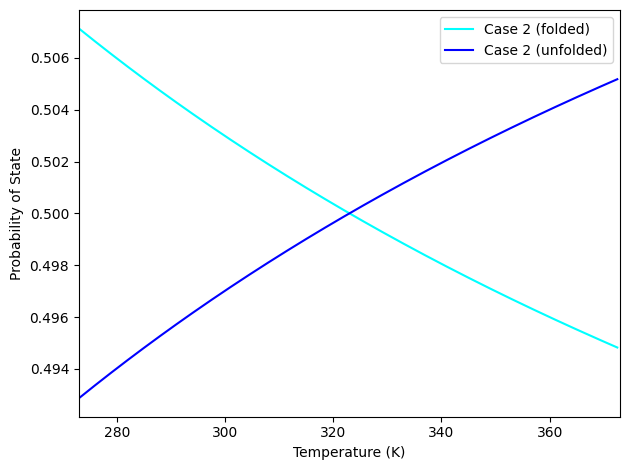

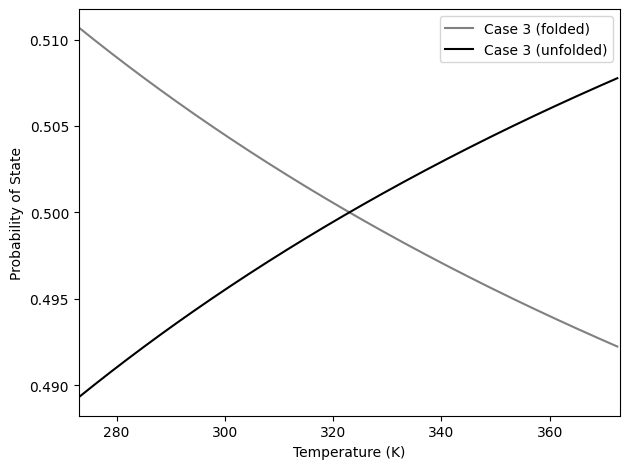

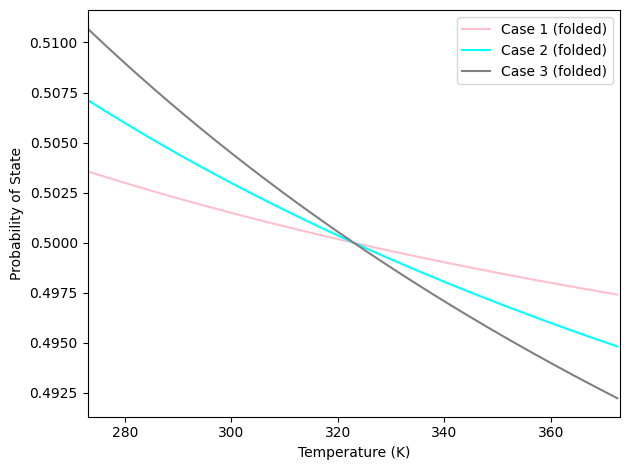

In [81]:
# Write a probability function

T = np.arange(273, 373, 0.5)
R = 1.987

def prob_state(deltaH, T, Tm):
    Tm = Tm + 273
    deltaG = (deltaH * (1 - (T/Tm)))
    
    statWtF = 1
    statWtU = np.exp((deltaG * -1) / (R*T))
    
    partFxn = 1 + np.exp((deltaG * -1) / (R*T))

    prob_F_state = statWtF / partFxn
    prob_U_state = statWtU / partFxn

    return prob_F_state, prob_U_state


# Case 1.
case1 = prob_state(50, T, 50)

# Case 2.
case2 = prob_state(100, T, 50)

# Case 3.
case3 = prob_state(150, T, 50)

# Folded Probabilities for all three

plt.plot(T, case1[0], label = "Case 1 (folded)", color = 'pink')
plt.plot(T, case1[1], label = "Case 1 (unfolded)", color = 'Red')

plt.ylabel("Probability of State")
plt.xlabel("Temperature (K)")
plt.xlim(273,373)
plt.legend(loc = "upper right")

plt.tight_layout()
plt.show()



plt.plot(T, case2[0], label = "Case 2 (folded)", color = 'cyan')
plt.plot(T, case2[1], label = "Case 2 (unfolded)", color = 'blue')

plt.ylabel("Probability of State")
plt.xlabel("Temperature (K)")
plt.xlim(273,373)
plt.legend(loc = "upper right")

plt.tight_layout()
plt.show()


plt.plot(T, case3[0], label = "Case 3 (folded)", color = 'grey')
plt.plot(T, case3[1], label = "Case 3 (unfolded)", color = 'black')

plt.ylabel("Probability of State")
plt.xlabel("Temperature (K)")
plt.xlim(273,373)
plt.legend(loc = "upper right")

plt.tight_layout()
plt.show()

plt.plot(T, case1[0], label = "Case 1 (folded)", color = 'pink')
plt.plot(T, case2[0], label = "Case 2 (folded)", color = 'cyan')
plt.plot(T, case3[0], label = "Case 3 (folded)", color = 'grey')

plt.ylabel("Probability of State")
plt.xlabel("Temperature (K)")
plt.xlim(273,373)
plt.legend(loc = "upper right")

plt.tight_layout()
plt.show()

##----------------------------------------------- ##
## What do you observe? Answer below as a comment ##
##----------------------------------------------- ##

# All of the plots follow a very similar trajectory
# Case 3 has the highest probability of have the folded state, and Case 1 has the lowest at low temps, but then it reverses at ~322K


**3. Free Energy Simulations II (Exploring Heat Capacity)**: On one graph plot $\Delta$G vs. T (in Kelvin) for the following three cases:

a. Case 1: $\Delta$H = 100 kcal/mol, Tm = 50C, $\Delta$Cp = 0 cal/(mol * K). <br>
b. Case 2: $\Delta$H = 100 kcal/mol, Tm = 50C, $\Delta$Cp = 1500 cal/(mol * K). <br>
c. Case 3: $\Delta$H = 100 kcal/mol, Tm = 50C, $\Delta$Cp = 3000 cal/(mol * K). <br>

By inspecting the graph, what is the difference between these cases?

# <font color='red'>Student Input Cell: 6 points</font>   

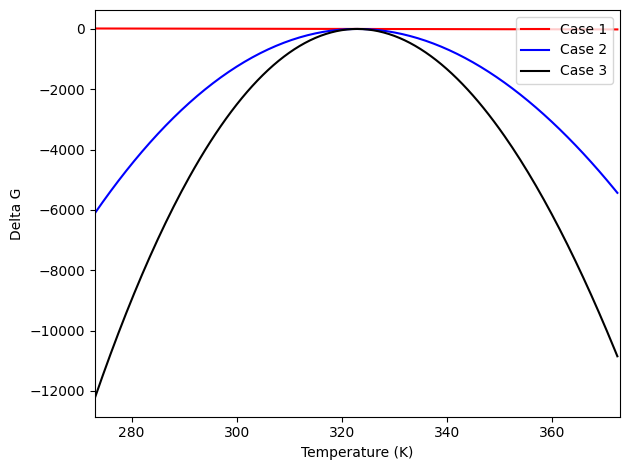

[15.47987616 15.3250774  15.17027864 15.01547988 14.86068111]
[-14.70588235 -14.86068111 -15.01547988 -15.17027864 -15.3250774 ]


In [82]:
T = np.arange(273, 373, 0.5)

def DELTA_G_wCp(deltaH, T, Tm, Cp):
    Tm = Tm + 273
    return (deltaH * (1 - (T/Tm)) + (Cp*(T*(1 - np.log(T/Tm)) - Tm)))
      
case1_wCp = DELTA_G_wCp(100, T, 50, 0)
case2_wCp = DELTA_G_wCp(100, T, 50, 1500)
case3_wCp = DELTA_G_wCp(100, T, 50, 3000)
               
plt.plot(T, case1_wCp, label = "Case 1", color = 'red')
plt.plot(T, case2_wCp, label = "Case 2", color = 'blue')
plt.plot(T, case3_wCp, label = "Case 3", color = 'black')


plt.ylabel("Delta G")
plt.xlabel("Temperature (K)")
plt.xlim(273,373)
plt.legend(loc = "upper right")

plt.tight_layout()
plt.show()

##----------------------------------------------- ##
## What do you observe? Answer below as a comment ##
##----------------------------------------------- ##

# Once again, Case 3 is most sensitive to changes in temperature, but this time is is due to it having the largest change in heat capacity
# Cases 1 change in free energy at these temperatures is so minimal compare to case 2 and 3 that it appear unchanging, although it does change:
print(case1_wCp[:5])
print(case1_wCp[-5:])

**4. Population Simulations**:

a. For each case from Question 3, make a plot of probability of the folded and unfolded states vs. T (between -50 and 100 C, but remember to use Kelvin!). <br>
b. One one graph, plot the **unfolded** probability vs. T for each case. <br>

What do you observe? How do you interpret it?

# <font color='red'>Student Input Cell: 8 points</font>   

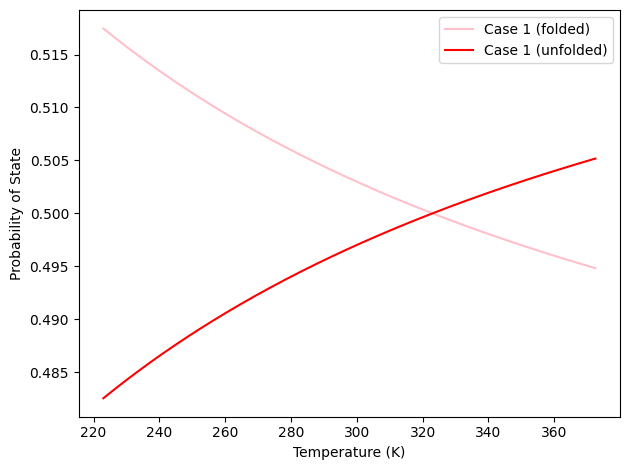

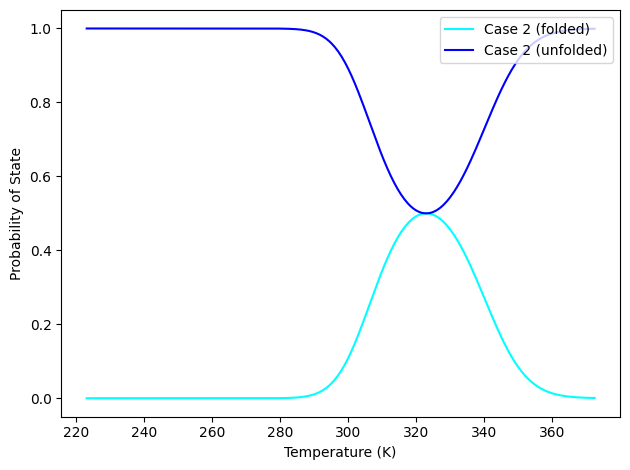

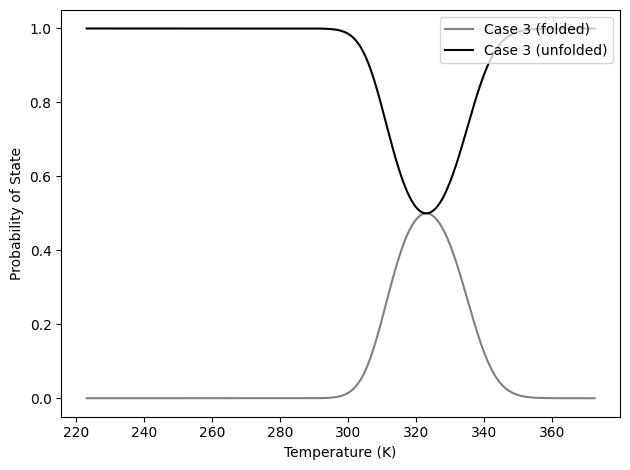

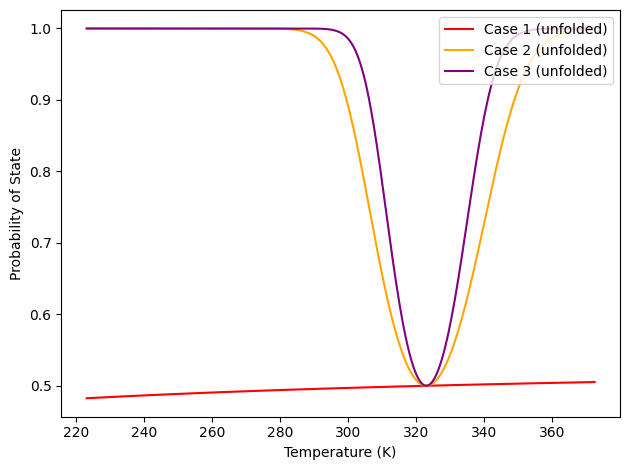

In [83]:
T_new = np.arange(223, 373, 0.5)
R = 1.987

def prob_state_wCp(deltaH, T_new, Tm, Cp):
    Tm = Tm + 273
    deltaG = (deltaH * (1 - (T_new/Tm)) + (Cp*(T_new*(1 - np.log(T_new/Tm)) - Tm)))
    
    statWtF = 1
    statWtU = np.exp((deltaG * -1) / (R*T_new))
    
    partFxn = 1 + np.exp((deltaG * -1) / (R*T_new))

    prob_F_state = statWtF / partFxn
    prob_U_state = statWtU / partFxn

    return prob_F_state, prob_U_state

case1_prob_wCp = prob_state_wCp(100, T_new, 50, 0)
case2_prob_wCp = prob_state_wCp(100, T_new, 50, 1500)
case3_prob_wCp = prob_state_wCp(100, T_new, 50, 3000)


plt.plot(T_new, case1_prob_wCp[0], label = "Case 1 (folded)", color = 'pink')
plt.plot(T_new, case1_prob_wCp[1], label = "Case 1 (unfolded)", color = 'Red')

plt.ylabel("Probability of State")
plt.xlabel("Temperature (K)")
#plt.xlim(-50,100)
plt.legend(loc = "upper right")

plt.tight_layout()
plt.show()



plt.plot(T_new, case2_prob_wCp[0], label = "Case 2 (folded)", color = 'cyan')
plt.plot(T_new, case2_prob_wCp[1], label = "Case 2 (unfolded)", color = 'blue')

plt.ylabel("Probability of State")
plt.xlabel("Temperature (K)")
#plt.xlim(223,373)
plt.legend(loc = "upper right")

plt.tight_layout()
plt.show()


plt.plot(T_new, case3_prob_wCp[0], label = "Case 3 (folded)", color = 'grey')
plt.plot(T_new, case3_prob_wCp[1], label = "Case 3 (unfolded)", color = 'black')

plt.ylabel("Probability of State")
plt.xlabel("Temperature (K)")
#plt.xlim(223,373)
plt.legend(loc = "upper right")

plt.tight_layout()
plt.show()

# Unfolded Probabilities for all three

plt.plot(T_new, case1_prob_wCp[1], label = "Case 1 (unfolded)", color = 'red')
plt.plot(T_new, case2_prob_wCp[1], label = "Case 2 (unfolded)", color = 'orange')
plt.plot(T_new, case3_prob_wCp[1], label = "Case 3 (unfolded)", color = 'purple')

plt.ylabel("Probability of State")
plt.xlabel("Temperature (K)")
#plt.xlim(223,373)
plt.legend(loc = "upper right")

plt.tight_layout()
plt.show()

##----------------------------------------------- ##
## What do you observe? Answer below as a comment ##
##----------------------------------------------- ##

# That for Case 2 and 3 the folded state never dominates the unfolded state... it reached 50/50 probability at around 322K but otherwise the unfolded state 
# dominates
# For Case 1, the folded state dominates until ~322K, but only slightly, for this system, it is a pretty even probability of having folded or unfolded protein
